<h1>Final Data Analysis Project Guide</h1>
<p><b>For SMASH CS Fundamentals II: Data Analysis</b>
<br>This guide assumes your class has already covered matplotlib, numpy, and SQL basics. 
<br>Here, I'll show you how to bring all three together to analyze a Pokemon database.
<br>This should give you an idea of what your final project might contain.
<br>The notes I write between chunks of code are examples of how you could talk through your program for your video or presentation.</p>
<p>Here is a link to the CSV file I am using:
<br><a href="https://github.com/ahob85/smash/blob/master/cs2/final/Pokemon.csv">https://github.com/ahob85/smash/blob/master/cs2/final/Pokemon.csv</a></p>

<p>matplotlib.pyplot API: 
<br><a href="https://matplotlib.org/api/pyplot_api.html">
https://matplotlib.org/api/pyplot_api.html</a></p>

<h2>Import libraries</h2>
<p>These libraries are essential.</p>

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3 
import csv

<h2>Create/Connect to a SQL database, and assign a "cursor"</h2>
<p>"cur" simply refers to the thing that will be doing the fetching and inserting in database for us.
<br>You can imagine it like a little robot scurrying all over the database, following our every command.</p>

In [26]:
conn = sqlite3.connect("mydatabase.sqlite3")
cur = conn.cursor()

<h2>Create a table</h2>
<p>This table reflects the structure of the data in the CSV file.
<br>Here we are simply specifying the columns (i.e., attributes) of the table. 
<br>Keep in mind that each record or "row" in our table is actually a <b>tuple</b>. 
<br>This will be tremendously helpful to us in a bit.</p>

In [27]:
cur.execute("DROP TABLE IF EXISTS Pokedex")
cur.execute("CREATE TABLE Pokedex ("
            "id INTEGER PRIMARY KEY, "
            "name TEXT, "
            "type1 TEXT, "
            "type2 TEXT, "
            "total INTEGER, "
            "hp INTEGER, "
            "attack INTEGER, "
            "defense INTEGER, "
            "spatk INTEGER, "
            "spdef INTEGER, "
            "speed INTEGER, "
            "generation INTEGER, "
            "legendary INTEGER)")

<h2>Import CSV data into table</h2>
<p>Make sure your CSV file is in the same directory as your Python file.
<br>Here we are simply inserting all rows from the CSV using a for-each loop.
<br>Remember, the rows are tuples. So the very first element of a row (row[0]) represents that record's id number.</p>

In [28]:
file = open("Pokemon.csv")
csv_file = csv.reader(file)
for row in csv_file:
    cur.execute("INSERT INTO Pokedex VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", 
                (row[0], row[1], row[2], row[3], row[4], row[5], row[6], 
                 row[7], row[8], row[9], row[10], row[11], row[12]))
    
conn.commit()

<h2>Test your table</h2>
<p>Let's test the integrity of our table by printing a few records.</p>

In [29]:
cur.execute("SELECT * FROM Pokedex LIMIT 10;")
for row in cur:
    print(row)

(1, 'Bulbasaur', 'Grass', 'Poison', 318, 45, 49, 49, 65, 65, 45, 1, 0)
(2, 'Ivysaur', 'Grass', 'Poison', 405, 60, 62, 63, 80, 80, 60, 1, 0)
(3, 'Venusaur', 'Grass', 'Poison', 525, 80, 82, 83, 100, 100, 80, 1, 0)
(4, 'VenusaurMega Venusaur', 'Grass', 'Poison', 625, 80, 100, 123, 122, 120, 80, 1, 0)
(5, 'Charmander', 'Fire', '', 309, 39, 52, 43, 60, 50, 65, 1, 0)
(6, 'Charmeleon', 'Fire', '', 405, 58, 64, 58, 80, 65, 80, 1, 0)
(7, 'Charizard', 'Fire', 'Flying', 534, 78, 84, 78, 109, 85, 100, 1, 0)
(8, 'CharizardMega Charizard X', 'Fire', 'Dragon', 634, 78, 130, 111, 130, 85, 100, 1, 0)
(9, 'CharizardMega Charizard Y', 'Fire', 'Flying', 634, 78, 104, 78, 159, 115, 100, 1, 0)
(10, 'Squirtle', 'Water', '', 314, 44, 48, 65, 50, 64, 43, 1, 0)


<h2>Create a function to compute stuff for you</h2>
<p>Let the computer do all the hard work while you sit back and chill.
<br>We'll first write a function that returns the mean of a list of values, rounded to the nearest hundreth decimal place.
<br>This will come in handy soon.</p>

In [30]:
def get_mean(nums):
    if(len(nums) == 0):
        return 0
    else:
        total = 0
        for num in nums:
            total += num
        return round(total / len(nums), 2)

<h2>Bring table data into program</h2>
<p>We will test our get_mean() function with data from our table.
<br>But first let's see what kind of thing is returned from a simple SELECT query.</p>

In [31]:
cur.execute("SELECT hp FROM Pokedex LIMIT 5")
for row in cur:
    print(row)

(45,)
(60,)
(80,)
(80,)
(39,)


Looks like SELECT returns tuples. Just as we said before, records are just tuples.
<br>This means if we want to access the integer values themselves, we would do so the same way we would with tuple or list. 
<br>In this case, each tuple above contains only one element (since I asked only for HP). 
<br>So the the info I want is at index 0.

In [32]:
cur.execute("SELECT hp FROM Pokedex WHERE name = 'Pikachu';")
data = cur.fetchone()[0] 
print(data)
print(type(data))

35
<class 'int'>


<h2>Test your function</h2>
<p>Now we can test our get_mean() function with some data from our table.</p>

In [33]:
cur.execute("SELECT hp FROM Pokedex")
hp_data = []
for row in cur:
    hp_data.append(row[0])
hp_mean = get_mean(hp_data)
print("HP mean = ", hp_mean)

HP mean =  69.26


<p>I wonder... is the average HP for non-Legendary Pokemon less than that for Legendary Pokemon?</p>

In [34]:
cur.execute("SELECT hp FROM Pokedex WHERE Legendary = 0")
nonlegendary_hp = []
for row in cur:
    nonlegendary_hp.append(row[0])
cur.execute("SELECT hp FROM Pokedex WHERE Legendary = 1")
legendary_hp = []
for row in cur:
    legendary_hp.append(row[0])
print("Non-Legendary HP mean =", get_mean(nonlegendary_hp))
print("Legendary HP mean =", get_mean(legendary_hp))

Non-Legendary HP mean = 67.18
Legendary HP mean = 92.74


<p>Yeah, that makes sense. 
<br>But I want to see it.</p>

<h2>Make a bar chart</h2>
<p>Let's use a bar chart to quickly display the difference between legendary and non-legendary groups in terms of mean statistics.</p>

In [35]:
# Create lists for both groups
nonlegendary_means = []
legendary_means = []

# Get means for all 6 stats for nonlegendary Pokemon
hp, attack, defense, spatk, spdef, speed = [], [], [], [], [], []
cur.execute("SELECT hp, attack, defense, spatk, spdef, speed FROM Pokedex WHERE Legendary = 0")
for row in cur:
    hp.append(row[0])
    attack.append(row[1])
    defense.append(row[2])
    spatk.append(row[3])
    spdef.append(row[4])
    speed.append(row[5])
nonlegendary_means.extend((get_mean(hp), get_mean(attack), 
                          get_mean(defense), get_mean(spatk), 
                          get_mean(spdef), get_mean(speed)))

# Get means for all 6 stats for legendary Pokemon
hp, attack, defense, spatk, spdef, speed = [], [], [], [], [], []
cur.execute("SELECT hp, attack, defense, spatk, spdef, speed FROM Pokedex WHERE Legendary = 1")
for row in cur:
    hp.append(row[0])
    attack.append(row[1])
    defense.append(row[2])
    spatk.append(row[3])
    spdef.append(row[4])
    speed.append(row[5])
legendary_means.extend((get_mean(hp), get_mean(attack), 
                        get_mean(defense), get_mean(spatk), 
                        get_mean(spdef), get_mean(speed)))

print("Nonlegendary means:", nonlegendary_means)
print("Legendary means:", legendary_means)

Nonlegendary means: [67.18, 75.67, 71.56, 68.45, 68.89, 65.46]
Legendary means: [92.74, 116.68, 99.66, 122.18, 105.94, 100.18]


<p>Now that we have the two lists of means, let's make our bar chart.</p>

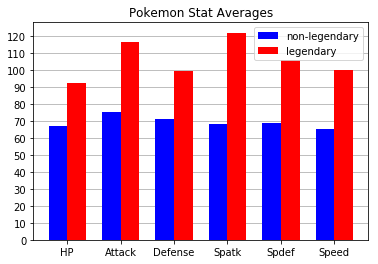

In [36]:
bar_width = 0.35
x_range = [0, 1, 2, 3, 4, 5]
y_range = list(range(0, 150, 10))
plt.rc("axes", axisbelow=True)

plt.figure(1)
plt.xticks(x_range,  ["HP", "Attack", "Defense", "Spatk", "Spdef", "Speed"])
plt.yticks(y_range)
plt.grid(axis="y")
plt.title("Pokemon Stat Averages")

nonlegendary_range = [x - bar_width / 2 for x in x_range]
legendary_range = [x + bar_width / 2 for x in x_range]

plt.bar(nonlegendary_range, nonlegendary_means, bar_width, color='blue', label='non-legendary')
plt.bar(legendary_range, legendary_means, bar_width, color='red', label='legendary')

plt.legend().draggable()

plt.show()

<h2>Write and test another function</h2>
<p>Let's write a function that returns the standard devation of a list of numbers, rounded to the nearest hundreth decimal place.</p>

In [37]:
def get_sd(nums):
    mean = get_mean(nums)
    total = 0
    for num in nums:
        total += (num - mean) ** 2
    variance = total / (len(nums) - 1)
    return round(variance ** 0.5, 2)

hp_sd = get_sd(hp_data)
print("HP standard deviation =", hp_sd)

HP standard deviation = 25.53


<h2>Make a histogram</h2>
<p>Let's use matplotlib to make a histogram of Pokemon hp.
<br>This will help us see how hp is distributed among all the Pokeymans.</p> 

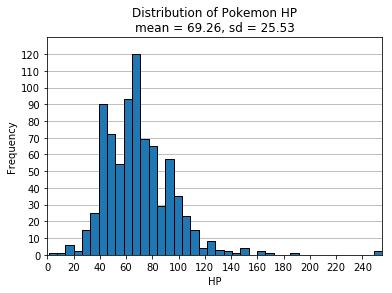

In [38]:
plt.figure(2)
plt.title("Distribution of Pokemon HP\nmean = {}, sd = {}".format(hp_mean, hp_sd))
plt.xlabel("HP")
plt.ylabel("Frequency")
plt.hist(hp_data, bins="auto", edgecolor="black")
plt.axis([min(hp_data), max(hp_data), 0, 130])
plt.xticks(list(range(0, max(hp_data), 20)))
plt.yticks(list(range(0, 130, 10)))
plt.grid(axis="y")
plt.show()

<p>This looks <b>positively skewed</b>. 
<br>There are <b>outliers</b> toward the right, especially that one or two waaaaay out there.</p>

In [39]:
print(max(hp_data))

255


<p>Which Pokemon has 255 base HP?</p>

In [40]:
cur.execute("SELECT name FROM Pokedex WHERE hp = 255")
print(cur.fetchone()[0])

Blissey


<p>WHAT? You mean this cute lil pudgeball has the most hp out of all the Pokemon? Guess so!
<br><img src="blissey.png" alt="blissey.png"></p>

<h2>Make a scatter plot</h2>
<p>I want to examine the relationship between defense and speed.
<br>According to EDA philosophy, it's good to get a visual before I run stats. This gives me a "feel" for the data that numbers might not provide.
<br>My hunch is that Pokemon with a lot of defense are generally slow. So the two variables should be <b>negatively correlated</b>.
<br>But I won't know until I see it for myself.</p>

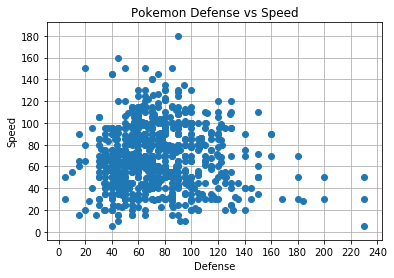

In [41]:
cur.execute("SELECT defense,speed FROM Pokedex")
d_data, s_data = [], []
for row in cur:
    d_data.append(row[0])
    s_data.append(row[1])
plt.figure(3)
plt.xticks(list(range(0, 250, 20)))
plt.yticks(list(range(0, 250, 20)))
plt.grid(True)
plt.title("Pokemon Defense vs Speed")
plt.xlabel("Defense")
plt.ylabel("Speed")
plt.scatter(d_data, s_data)
plt.show()

<p>Hmm... hard to see any kind of correlation here, at least with my own two eyes. 
<br>Time to break out the numpy library.</p>

<h2>Find Pearson correlation coefficient (r) between two variables</h2>
<p>It's easy with numpy.</p>

In [42]:
correlation = np.corrcoef(d_data, s_data)
print(correlation)

[[ 1.         0.0152266]
 [ 0.0152266  1.       ]]


In [43]:
correlation = round(np.corrcoef(d_data, s_data)[0][1], 2)
print("r =", correlation)

r = 0.02


<p><br>Our r coefficient is about 0.02. This means the relationship is pretty much nonexistant.
<br>Or more properly, we'd say <b>defense does not predict speed (and vice versa)</b>.
<br>My hunch was wrong!</p>

<h2>Make another scatter plot</h2>
<p>Let's try something else. I'll see if there is a relationship between attack power and HP.
<br>Let's take a look!</p>

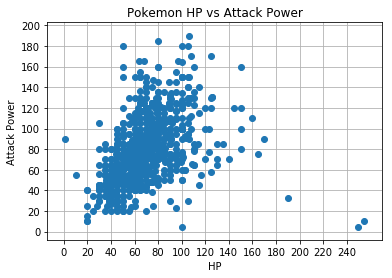

In [44]:
a_data = []
cur.execute("SELECT attack FROM Pokedex")
for row in cur:
    a_data.append(row[0])
plt.figure(4)
plt.xticks(list(range(0, 250, 20)))
plt.yticks(list(range(0, 250, 20)))
plt.grid(True)
plt.title("Pokemon HP vs Attack Power")
plt.xlabel("HP")
plt.ylabel("Attack Power")
plt.scatter(hp_data, a_data)
plt.show()

<p>Looks like there is a relationship! 
<br>There are a few <b>outliers</b> toward the right end. 
<br>These are Pokemon with high HP but almost no attack power, one of whom is probably Blissey!
<br>Let's calculate r for these two variables.</p>

In [45]:
correlation = round(np.corrcoef(hp_data, a_data)[0][1], 2)
print("r =", correlation)

r = 0.42


So we got a 0.42 on this one, which indicates a moderately positive relationship between the two variables.
<br>Those outliers are very likely throwing this off a tad... but hey, that's Pokemon for you. Gotta catch 'em all, even the weird ones.

<h2>Create a model</h2>
Now that we have identified at least a moderate relationship between two variables, we can think about regression. 
<br>The scatter plot we made appears to follow a linear (y = ax + b) model, doesn't it?
<br>So let's make one with numpy and see how it fits.

In [46]:
model = np.polyfit(hp_data, a_data, deg=1)
print(model)

[  0.53689898  41.81629745]


<p><br>So our model is:
<br><b>attack = 0.54 * hp + 41.82</b></p>

<h2>Plot the model onto the data</h2>
<p>Now let's plot the model onto the data to judge how well it fits with our eyes.</p>

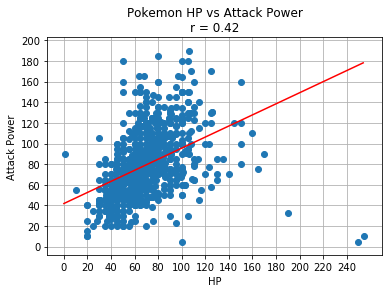

In [47]:
x_range = list(range(max(hp_data))) 
p = np.poly1d(model)               
y_range = p(x_range)                
plt.figure(5)
plt.xticks(list(range(0, 250, 20)))
plt.yticks(list(range(0, 250, 20)))
plt.grid(True)
plt.title("Pokemon HP vs Attack Power\nr = {}".format(correlation))
plt.xlabel("HP")
plt.ylabel("Attack Power")
plt.scatter(hp_data, a_data)
plt.plot(x_range, y_range, color="red") 
plt.show()

<p>Well, what do you think? Does this linear model fit the data well?
<br><b>In your own project, you should explain why or why not.</b>


<h1>If you have this much, you're done!</h1>
<p>Feel free to add more!
<br>Again, this was just an example of what your project might look like.
<br>As you can see, I'm using various quantitative and visual techniques to transform data into information.
<br>Just be sure to record a video of you demonstrating your program in action.
<br>Oh, and of course, don't forget to close your connection to the database.</p>

In [48]:
conn.close()